# THOMAS NGO
# TEVIN VU
# PROJECT 5

In [ ]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [84]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras.activations import relu, sigmoid, tanh, softmax
from keras.layers import Dense, LeakyReLU, BatchNormalization, Dropout, Activation, ReLU
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import GridSearchCV

### 1. Use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.

In [85]:
datasets = np.load('emnist_letters.npz')
train_images, train_labels  = datasets['train_images'], datasets['train_labels']
test_images, test_labels = datasets['test_images'], datasets['test_labels']
validate_images, validate_labels = datasets['validate_images'], datasets['validate_labels']
dataset_shape = datasets['train_images'].shape

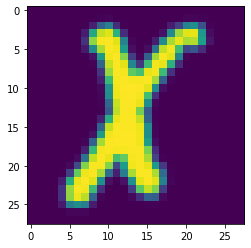

In [ ]:
plt.imshow(train_images[5435].reshape(28,28))

In [ ]:
print(chr(np.argmax(train_labels[5435]) - 1 + ord('A')))
# print(chr(np.argmax(datasets['train_labels'][0]) - 1 + ord('A')))

X


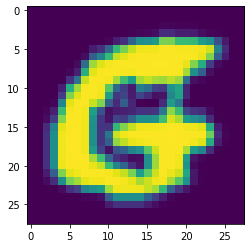

In [ ]:
plt.imshow(train_images[1].reshape(28,28))

In [ ]:
print(train_labels.shape)


(104000, 27)


In [ ]:
print(chr(np.argmax(train_labels[1]) - 1 + ord('A')))

G


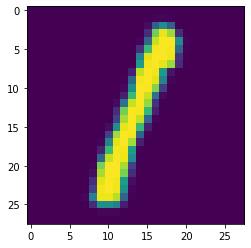

In [ ]:
plt.imshow(validate_images[1].reshape(28,28))

In [ ]:
print(chr(np.argmax(validate_labels[1]) - 1 + ord('A')))

L


In [ ]:
print(validate_labels.shape)
print(validate_images.shape)

(20800, 27)
(20800, 784)


### 2. Begin by applying the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. What accuracy do you achieve? How does this compare with the accuracy for MNIST?. 

In [ ]:
train_images.shape

(104000, 784)

In [ ]:
test_images.shape

(20800, 784)

In [ ]:
len(train_labels)

104000

In [ ]:
test_labels.shape

(20800, 27)

In [ ]:
len(test_labels)

20800

In [ ]:
test_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [86]:
network = models.Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(27, activation='softmax'))

In [87]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)
network.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(validate_images,validate_labels))

Epoch 1/5
813/813 [==============================] - 3s 3ms/step - loss: 1.0710 - accuracy: 0.6928 - val_loss: 0.4862 - val_accuracy: 0.8533
Epoch 2/5
813/813 [==============================] - 3s 3ms/step - loss: 0.3961 - accuracy: 0.8766 - val_loss: 0.3677 - val_accuracy: 0.8866
Epoch 3/5
813/813 [==============================] - 3s 3ms/step - loss: 0.3083 - accuracy: 0.9002 - val_loss: 0.3382 - val_accuracy: 0.8958
Epoch 4/5
813/813 [==============================] - 3s 3ms/step - loss: 0.2604 - accuracy: 0.9160 - val_loss: 0.3327 - val_accuracy: 0.8996
Epoch 5/5
813/813 [==============================] - 3s 3ms/step - loss: 0.2270 - accuracy: 0.9245 - val_loss: 0.3368 - val_accuracy: 0.8970


In [88]:
test_lost, test_acc = network.evaluate(test_images, test_labels) #run this

650/650 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8962


In [89]:
print('Test Accuracy: ', test_acc) #run this
orginal_model_acc = test_acc

Test Accuracy:  0.8962019085884094


### 3. Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:
- There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.
- In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.
- The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.

In [90]:
#run this
model = models.Sequential()
model.add(Dense(10000, activation='relu', input_shape=(28*28,)))
model.add(Dense(27, activation='softmax'))

In [91]:
#run this
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.1)
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(validate_images,validate_labels))

Epoch 1/5
813/813 [==============================] - 6s 7ms/step - loss: 0.9680 - accuracy: 0.7282 - val_loss: 0.4303 - val_accuracy: 0.8732
Epoch 2/5
813/813 [==============================] - 5s 6ms/step - loss: 0.3168 - accuracy: 0.8991 - val_loss: 0.3652 - val_accuracy: 0.8950
Epoch 3/5
813/813 [==============================] - 5s 6ms/step - loss: 0.2497 - accuracy: 0.9201 - val_loss: 0.4033 - val_accuracy: 0.8955
Epoch 4/5
813/813 [==============================] - 5s 7ms/step - loss: 0.2119 - accuracy: 0.9324 - val_loss: 0.3775 - val_accuracy: 0.9024
Epoch 5/5
813/813 [==============================] - 5s 6ms/step - loss: 0.1903 - accuracy: 0.9383 - val_loss: 0.4274 - val_accuracy: 0.9017


In [92]:
test_lost, test_acc = model.evaluate(test_images, test_labels) #run this

650/650 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.9012


What accuracy do you achieve?

In [93]:
print('Test Accuracy: ', test_acc) #run this
modified_org_model_acc = test_acc

Test Accuracy:  0.9012019038200378


How does this compare with the accuracy for MNIST? 
- This accuracy is greater than MNIST a little bit.

### 4. Once you have settled on the size of the hidden layer, use the techniques you learned in Chapters 3 and 4 of the textbook to obtain the highest accuracy you can on the validation set. These might include:

  - Preprocessing
  - Weight initialization
  - Choice of activation function
  - Optimizer
  - Batch Normalization
  - Regularization
  - Data augmentation
  - Dropout
  - Early Stopping

You may find the slides for Chapter 3 helpful, particularly the presentation “Neural Network Training [Initialization, Preprocessing, Mini-Batching, Tuning, and Other Black Art].”

In [3]:
# Preprocessing data input(run this)

# using sklearn min-max scaler
# train_images = minmax_scale(train_images)
# test_images = minmax_scale(test_images)

# using sklearn standard scaler
X_scaler = StandardScaler().fit(train_images)
train_images = X_scaler.transform(train_images)
Y_scaler = StandardScaler().fit(test_images)
test_images = Y_scaler.transform(test_images)



In [ ]:
# define model with batch normalization
def define_model(func_name='relu', 
                 kernel_initializer='glorot_normal', 
                 batch_size=128,
                 epochs=5,
                 optimizer='rmsprop'):
  # build model
  model = models.Sequential()
  model.add(Dense(1000,
                  kernel_initializer=kernel_initializer,
                  use_bias=False))
  model.add(BatchNormalization())
  model.add(Activation(func_name))
  model.add(Dense(27, activation='softmax'))
  # compile mode
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# create params dictionary for gridsearch
func_names = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad']
kernel_initializers= ['glorot_uniform', 'glorot_normal']
batch_sizes = [128, 256, 512]
parmam_grid = dict(optimizer=optimizers, 
                   func_name=func_names, 
                   batch_size=batch_sizes, 
                   kernel_initializer=kernel_initializers)
print(parmam_grid)

{'optimizer': ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad'], 'func_name': ['relu', 'tanh', 'sigmoid'], 'batch_size': [128, 256, 512], 'kernel_initializer': ['glorot_uniform', 'glorot_normal']}


In [ ]:
# create model
model = KerasClassifier(build_fn=define_model)

# perform gridsearch
grid = GridSearchCV(estimator=model, param_grid=parmam_grid, verbose=1)
grid_res = grid.fit(train_images, train_labels)

print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


41/41 [==============================] - 0s 4ms/step - loss: 3.0282 - accuracy: 0.2084


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 17.1min finished


813/813 [==============================] - 3s 3ms/step - loss: 0.8941 - accuracy: 0.7384
Best accuracy: 0.8546826958656311 using {'batch_size': 128, 'func_name': 'relu', 'kernel_initializer': 'glorot_normal', 'optimizer': 'rmsprop'}


In [ ]:
print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Best accuracy: 0.8546826958656311 using {'batch_size': 128, 'func_name': 'relu', 'kernel_initializer': 'glorot_normal', 'optimizer': 'rmsprop'}


In [ ]:
# define model with dropout
def define_model_2(func_name='relu', 
                   kernel_initializer='glorot_normal', 
                   batch_size=128,
                   epochs=100,
                   dropout_rate=0.5,
                   optimizer='rmsprop'):
    # build model
    model = models.Sequential()
    model.add(Dense(1000,
                    activation=func_name,
                    kernel_initializer=kernel_initializer,
                    use_bias=True))
    model.add(Dense(27, activation='softmax'))
    model.add(Dropout(dropout_rate))
    # compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# create params dictionary for gridsearch
func_names = ['relu', 'tanh', 'sigmoid']
optimizers = ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad']
kernel_initializers= ['glorot_uniform', 'glorot_normal']
batch_sizes = [128, 256, 512]
dropout_rates = [0.2, 0.5]
parmam_grid = dict(optimizer=optimizers, 
                   func_name=func_names, 
                   batch_size=batch_sizes,
                   dropout_rate=dropout_rates,
                   kernel_initializer=kernel_initializers)
print(parmam_grid)

{'optimizer': ['rmsprop', 'sgd', 'adam', 'adadelta', 'adagrad'], 'func_name': ['relu', 'tanh', 'sigmoid'], 'batch_size': [128, 256, 512], 'dropout_rate': [0.2, 0.5], 'kernel_initializer': ['glorot_uniform', 'glorot_normal']}


In [ ]:
# create model
model = KerasClassifier(build_fn=define_model_2)

# perform gridsearch
grid = GridSearchCV(estimator=model, param_grid=parmam_grid, verbose=1)
grid_res = grid.fit(train_images, train_labels)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


41/41 [==============================] - 0s 4ms/step - loss: 3.2041 - accuracy: 0.0855


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 30.4min finished


407/407 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.5598


In [ ]:
print(f'Best accuracy: {grid_res.best_score_} using {grid_res.best_params_}')

Best accuracy: 0.8300673007965088 using {'batch_size': 256, 'dropout_rate': 0.2, 'func_name': 'relu', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'adam'}


In [73]:
# building model (run this)
model = models.Sequential()
model.add(Dense(10000,
                # activation=LeakyReLU(alpha=0.01), 
                # activation='relu',
                input_shape=(28*28,),
                kernel_initializer='glorot_normal',
                # kernel_regularizer=l2(0.01),
                use_bias=False)) # set False if BatchNormalization is used and remove dropout
model.add(BatchNormalization()) # pre-activation normalization
model.add(LeakyReLU(alpha=0.01))
# model.add(Activation(relu))
# model.add(Dropout(0.2)) # don't use this when using with BatchNormalization??
model.add(Dense(27, activation='softmax'))

In [74]:
# compile model (run this)
model.compile(
    optimizer='adam',
              # optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', 
                         patience=10,
                        #  restore_best_weights=False)
                         restore_best_weights=True)

model.fit(train_images, 
          train_labels, 
          epochs=1000, 
          batch_size=256, 
          # batch_size=128,
          validation_data=(validate_images,validate_labels),
          callbacks=[callback],
          verbose=1)

Epoch 1/1000
407/407 [==============================] - 4s 8ms/step - loss: 1.3393 - accuracy: 0.7152 - val_loss: 1.8784 - val_accuracy: 0.4358
Epoch 2/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.4473 - accuracy: 0.8671 - val_loss: 1.5449 - val_accuracy: 0.5373
Epoch 3/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.3586 - accuracy: 0.8894 - val_loss: 1.3136 - val_accuracy: 0.6137
Epoch 4/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.2874 - accuracy: 0.9085 - val_loss: 1.3341 - val_accuracy: 0.5895
Epoch 5/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.2453 - accuracy: 0.9196 - val_loss: 1.3431 - val_accuracy: 0.5846
Epoch 6/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.2071 - accuracy: 0.9296 - val_loss: 1.2749 - val_accuracy: 0.6262
Epoch 7/1000
407/407 [==============================] - 3s 8ms/step - loss: 0.1960 - accuracy: 0.9326 - val_loss: 1.2473 - val_accuracy:

In [76]:
# run model against TEST SET (this)
test_lost, test_acc = model.evaluate(test_images, test_labels)

# get accuracy
print('Test Accuracy: ', test_acc)
modified_model_acc = test_acc

650/650 [==============================] - 1s 2ms/step - loss: 1.0368 - accuracy: 0.9068
Test Accuracy:  0.906826913356781


In [94]:
(modified_model_acc - modified_org_model_acc)*100 #run this

0.5625009536743164

(28, 28, 1)


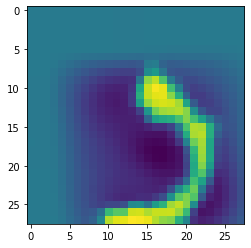

In [68]:
# attempt to do augmentation
# inspired from https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

X_train = train_images.reshape(104000, 28, 28, 1)
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)
datagen.fit(X_train)
it = datagen.flow(X_train, train_labels)

print(it[0][0][0].shape)
# print(it[0][0][0])
plt.imshow(it[0][0][0].reshape(28,28))

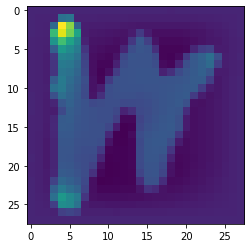

In [69]:
# original image
plt.imshow(train_images[0].reshape(28,28))

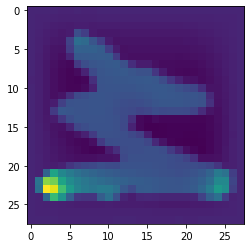

In [70]:
test_rotate_0 = np.rot90(train_images[0].reshape(28,28))
plt.imshow(test_rotate_0)

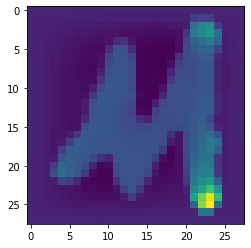

In [71]:
test_flip_0 = np.flip(train_images[0].reshape(28,28))
plt.imshow(test_flip_0)

(104000, 784)
-2.9526291438142732e-15
0.23501253876711675


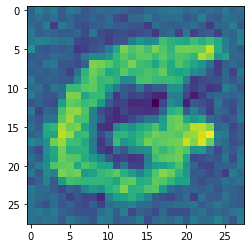

In [72]:
print(train_images.shape)
print(train_images.mean(axis=0).mean(axis=0))
mean = train_images.mean(axis=0).mean(axis=0)
print(train_images.std(axis=0).std(axis=0))
std = train_images.std(axis=0).std(axis=0)
noise = np.random.normal(mean, std, train_images.shape)
test_add_noise = train_images + noise
plt.imshow(test_add_noise[1].reshape(28,28))

In [ ]:
# this takes too long
train_images_shape = train_images.shape
for i in range(train_images_shape[0]):
  curr_rotate_img = np.rot90(train_images[i].reshape(28,28))
  curr_rotate_img = curr_rotate_img.reshape(28*28,)
#   print(curr_rotate_img.shape)
#   train_images = np.append(train_images, [curr_rotate_img], axis=0)

### 5. Add additional Dense hidden layers as appropriate to improve the accuracy. Note that you may need to adjust your hyperparameters or other aspects of the network architecture in response to these changes. How does the accuracy for your deep network compare with the accuracy you achieved in experiment (4)?. 


In [4]:
# build model
model = models.Sequential()
model.add(Dense(10000,
                input_shape=(28*28,),
                kernel_initializer='glorot_normal',
                # kernel_regularizer=l2(0.01),
                use_bias=False)) # set False if BatchNormalization is used and remove dropout
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(10000,
                input_shape=(28*28,),
                use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(10000,
#                 input_shape=(28*28,),
#                 use_bias=False))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.01))
model.add(Dense(27, activation='softmax'))

In [5]:
# compile model (run this)
model.compile(
    optimizer='adam',
              # optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(monitor='accuracy', 
                         patience=10,
                        #  restore_best_weights=False)
                         restore_best_weights=True)

model.fit(train_images, 
          train_labels, 
          epochs=1000, 
          batch_size=256, 
          # batch_size=128,
          validation_data=(validate_images,validate_labels),
          callbacks=[callback],
          verbose=1)

Epoch 1/1000
407/407 [==============================] - 29s 62ms/step - loss: 1.4920 - accuracy: 0.7190 - val_loss: 4.8472 - val_accuracy: 0.3054
Epoch 2/1000
407/407 [==============================] - 26s 63ms/step - loss: 0.4462 - accuracy: 0.8686 - val_loss: 6.9787 - val_accuracy: 0.2312
Epoch 3/1000
407/407 [==============================] - 27s 66ms/step - loss: 0.3206 - accuracy: 0.8988 - val_loss: 9.6418 - val_accuracy: 0.1205
Epoch 4/1000
407/407 [==============================] - 28s 69ms/step - loss: 0.2570 - accuracy: 0.9167 - val_loss: 9.4174 - val_accuracy: 0.2268
Epoch 5/1000
407/407 [==============================] - 27s 66ms/step - loss: 0.2250 - accuracy: 0.9222 - val_loss: 11.3936 - val_accuracy: 0.1780
Epoch 6/1000
407/407 [==============================] - 27s 66ms/step - loss: 0.2020 - accuracy: 0.9321 - val_loss: 13.4434 - val_accuracy: 0.0942
Epoch 7/1000
407/407 [==============================] - 27s 67ms/step - loss: 0.1790 - accuracy: 0.9370 - val_loss: 12.850

In [6]:
# run model against TEST SET
test_lost, test_acc = model.evaluate(test_images, test_labels)

# get accuracy
print('Test Accuracy: ', test_acc)
deep_net_model_acc = test_acc

650/650 [==============================] - 3s 4ms/step - loss: 0.7852 - accuracy: 0.9169
Test Accuracy:  0.9168750047683716


In [ ]:
print(f'Improvement/Loss accuracy: {(deep_net_model_acc - modified_model_acc)*100}')

Improvement/Loss accuracy: 1.7980754375457764


How does the accuracy for your deep network compare with the accuracy you achieved in experiment (4)?

In [77]:
print(f"Test accuracy of experience (4): {modified_model_acc}")
print(f"Test accuracy of experience (5): {deep_net_model_acc}")
print(f"Improvement/Loss accuracy between (4) and (5): {(deep_net_model_acc - modified_model_acc)*100}")

Test accuracy of experience (4): 0.906826913356781
Test accuracy of experience (5): 0.9168750047683716
Improvement/Loss accuracy between (4) and (5): 1.0048091411590576


### 6. When finished tuning, evaluate your results on the test set. Compare the test performance of your original network from experiment (2) and the final networks for experiments (3) and (4).

In [95]:
print(f"Test accuracy of experience (2): {orginal_model_acc}")
print(f"Test accuracy of experience (3): {modified_org_model_acc}")
print(f"Test accuracy of experience (4): {modified_model_acc}")

Test accuracy of experience (2): 0.8962019085884094
Test accuracy of experience (3): 0.9012019038200378
Test accuracy of experience (4): 0.906826913356781


- Increase the number of neuron in experiment (3)compare with (2), it doesn't improve much. 
- Even in eperiment (4) we try tune parameters to make improvement compare with (2), the training process experiment(4) run faster and test accuracy doesn't improve much. 

### 7. Use plt.imshow() to view some of the misclassified images and examine their labels. Describe what you think might have gone wrong.

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             7840000   
_________________________________________________________________
batch_normalization (BatchNo (None, 10000)             40000     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10000)             100000000 
_________________________________________________________________
batch_normalization_1 (Batch (None, 10000)             40000     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                2

In [52]:
misclassificationIdx = []
for idx,img in enumerate(test_images[:200]):
  pred = model.predict(img.reshape(1,28*28))
  pred_letter = chr(np.argmax(pred) - 1 + ord('A'))
  target_letter = chr(np.argmax(test_labels[idx]) - 1 + ord('A'))
  if pred_letter != target_letter:
    misclassificationIdx.append(idx)

In [53]:
print(misclassificationIdx)


[33, 44, 51, 76, 90, 119, 128, 129, 132, 164]


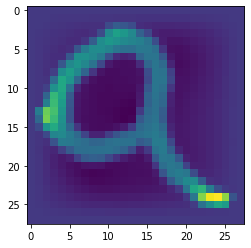

In [56]:
plt.imshow(test_images[misclassificationIdx[0]].reshape(28,28))

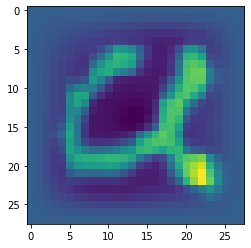

In [57]:
plt.imshow(test_images[misclassificationIdx[1]].reshape(28,28))

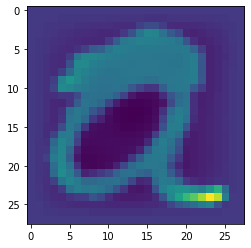

In [58]:
plt.imshow(test_images[misclassificationIdx[2]].reshape(28,28))

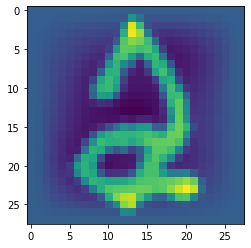

In [59]:
plt.imshow(test_images[misclassificationIdx[3]].reshape(28,28))

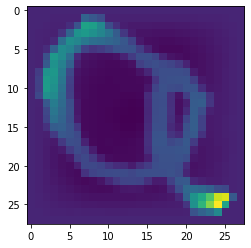

In [60]:
plt.imshow(test_images[misclassificationIdx[4]].reshape(28,28))

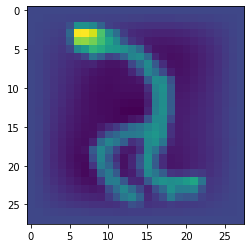

In [61]:
plt.imshow(test_images[misclassificationIdx[5]].reshape(28,28))

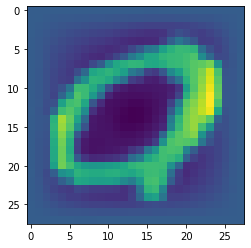

In [62]:
plt.imshow(test_images[misclassificationIdx[6]].reshape(28,28))

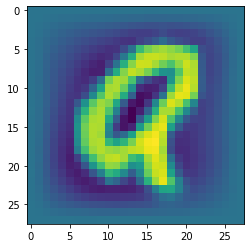

In [63]:
plt.imshow(test_images[misclassificationIdx[7]].reshape(28,28))

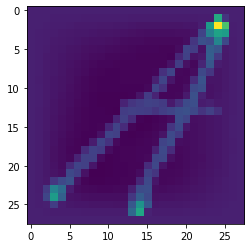

In [64]:
plt.imshow(test_images[misclassificationIdx[8]].reshape(28,28))

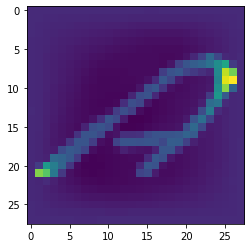

In [65]:
plt.imshow(test_images[misclassificationIdx[9]].reshape(28,28))

Describe what you think might have gone wrong:
First of all, with human eye there is a couple image we couldn't recognize it. Secondly, different people will have different ways to write the same letter or penmanship.